In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("mmc4.csv")

In [68]:
df.head()

,date_time,Time,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
0,15-08-2016 00:00,00:00:00,122.0,0,0.000052,7.5,77.9,0,0.0
1,15-08-2016 00:01,00:01:00,135.0,0,0.000051,8.2,77.9,1,NaN
2,15-08-2016 00:02,00:02:00,111.0,0,0.000052,6.2,77.9,2,NaN
3,15-08-2016 00:03,00:03:00,109.0,0,0.000053,5.6,77.0,3,NaN
4,15-08-2016 00:04,00:04:00,126.0,0,0.000053,9.0,77.0,4,NaN


In [69]:
df.describe()

,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
count,69941.000000,73440.000000,69921.000000,73440.000000,69921.000000,73440.000000,1.0
mean,90.089618,5.398026,0.088322,2.340063,87.412743,36719.500000,0.0
std,14.495608,18.676877,0.945392,1.398170,2.632010,21200.446222,NaN
min,39.000000,0.000000,0.000048,1.200000,69.800000,0.000000,0.0
25%,81.000000,0.000000,0.000057,1.500000,86.000000,18359.750000,0.0
50%,91.000000,0.000000,0.000062,2.000000,87.800000,36719.500000,0.0
75%,99.000000,0.000000,0.000106,2.600000,88.700000,55079.250000,0.0
max,187.000000,146.000000,28.520100,19.100000,98.600000,73439.000000,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73440 entries, 0 to 73439
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               73440 non-null  object 
 1   Time                    73440 non-null  object 
 2   hr                      69941 non-null  float64
 3   steps                   73440 non-null  int64  
 4   Galvanic skin response  69921 non-null  float64
 5   calories                73440 non-null  float64
 6   temp                    69921 non-null  float64
 7   sec                     73440 non-null  int64  
 8   Unnamed: 8              1 non-null      float64
dtypes: float64(5), int64(2), object(2)
memory usage: 5.0+ MB


In [71]:
df.isnull().sum()

date_time                     0
Time                          0
hr                         3499
steps                         0
Galvanic skin response     3519
calories                      0
temp                       3519
sec                           0
Unnamed: 8                73439
dtype: int64

In [72]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

12.705156136528686


In [73]:
df = df.drop(['Unnamed: 8'],axis =1)
df.columns

Index(['date_time', 'Time', 'hr', 'steps', 'Galvanic skin response',
       'calories', 'temp', 'sec'],
      dtype='object')

In [74]:
df.head()

,date_time,Time,hr,steps,Galvanic skin response,calories,temp,sec
0,15-08-2016 00:00,00:00:00,122.0,0,0.000052,7.5,77.9,0
1,15-08-2016 00:01,00:01:00,135.0,0,0.000051,8.2,77.9,1
2,15-08-2016 00:02,00:02:00,111.0,0,0.000052,6.2,77.9,2
3,15-08-2016 00:03,00:03:00,109.0,0,0.000053,5.6,77.0,3
4,15-08-2016 00:04,00:04:00,126.0,0,0.000053,9.0,77.0,4


In [75]:
df.tail()

,date_time,Time,hr,steps,Galvanic skin response,calories,temp,sec
73435,04-10-2016 23:55,23:55:00,85.0,0,0.000056,1.9,86.9,73435
73436,04-10-2016 23:56,23:56:00,83.0,0,0.000056,1.8,86.9,73436
73437,04-10-2016 23:57,23:57:00,85.0,0,0.000057,1.9,86.9,73437
73438,04-10-2016 23:58,23:58:00,93.0,0,0.000056,3.1,86.9,73438
73439,04-10-2016 23:59,23:59:00,104.0,0,0.000057,5.2,86.9,73439


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73440 entries, 0 to 73439
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               73440 non-null  object 
 1   Time                    73440 non-null  object 
 2   hr                      69941 non-null  float64
 3   steps                   73440 non-null  int64  
 4   Galvanic skin response  69921 non-null  float64
 5   calories                73440 non-null  float64
 6   temp                    69921 non-null  float64
 7   sec                     73440 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 4.5+ MB


<AxesSubplot:xlabel='hr', ylabel='Count'>

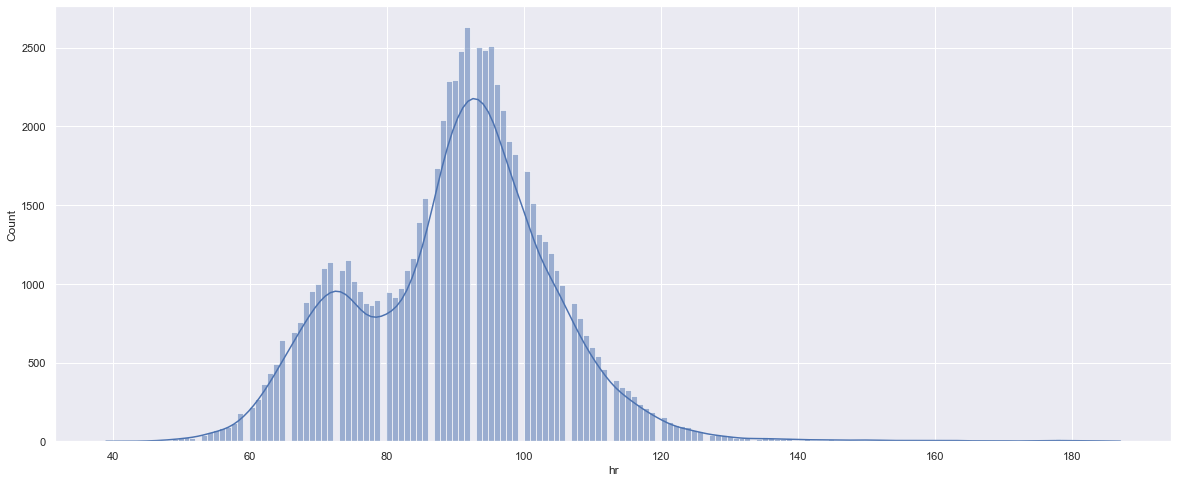

In [77]:
sns.histplot(data=df, x="hr", kde = True)

#### this graph shows that distribution is noermally distributed and peak shows that the most probable event in the our dataset i.e, around 90 hr per min.

In [78]:
df = df.set_index('date_time')
df.head()

,Time,hr,steps,Galvanic skin response,calories,temp,sec
date_time,,,,,,,
15-08-2016 00:00,00:00:00,122.0,0,0.000052,7.5,77.9,0
15-08-2016 00:01,00:01:00,135.0,0,0.000051,8.2,77.9,1
15-08-2016 00:02,00:02:00,111.0,0,0.000052,6.2,77.9,2
15-08-2016 00:03,00:03:00,109.0,0,0.000053,5.6,77.0,3
15-08-2016 00:04,00:04:00,126.0,0,0.000053,9.0,77.0,4


In [79]:
df.index

Index(['15-08-2016 00:00', '15-08-2016 00:01', '15-08-2016 00:02',
       '15-08-2016 00:03', '15-08-2016 00:04', '15-08-2016 00:05',
       '15-08-2016 00:06', '15-08-2016 00:07', '15-08-2016 00:08',
       '15-08-2016 00:09',
       ...
       '04-10-2016 23:50', '04-10-2016 23:51', '04-10-2016 23:52',
       '04-10-2016 23:53', '04-10-2016 23:54', '04-10-2016 23:55',
       '04-10-2016 23:56', '04-10-2016 23:57', '04-10-2016 23:58',
       '04-10-2016 23:59'],
      dtype='object', name='date_time', length=73440)

In [80]:
sns.set(rc={'figure.figsize':(20, 8)})

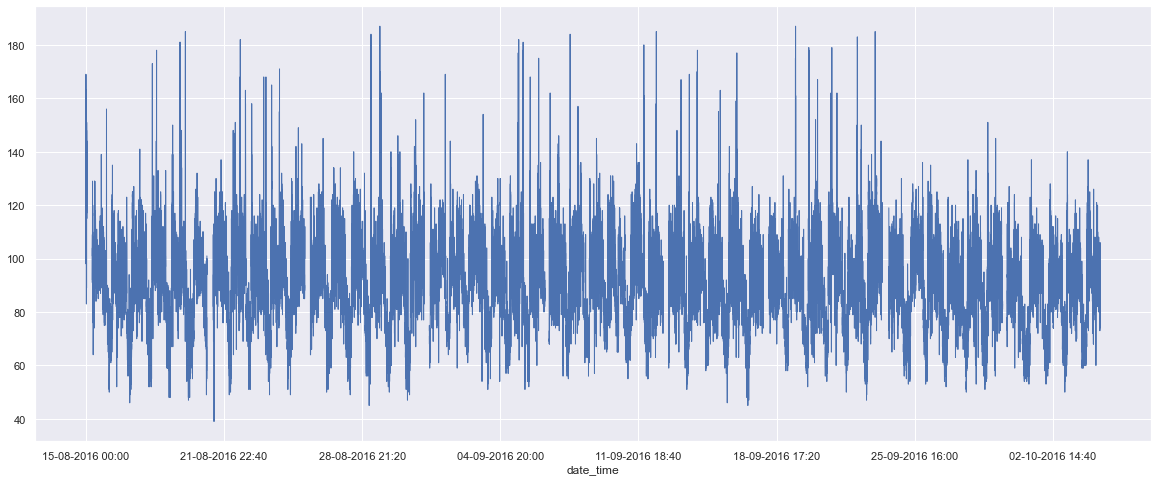

In [81]:
df['hr'].plot(linewidth=1);


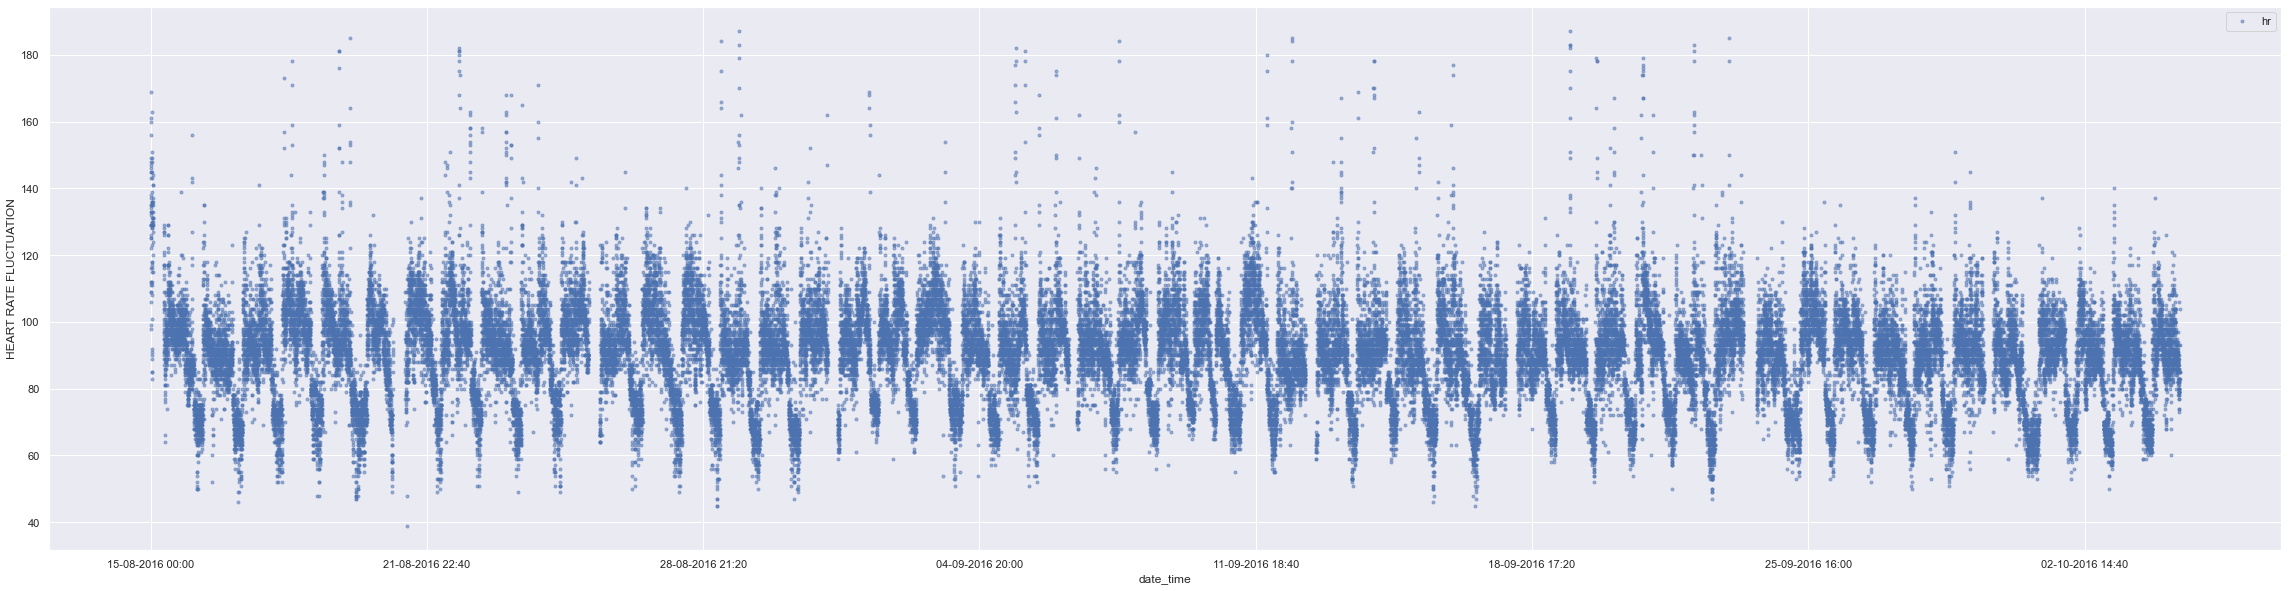

In [82]:
cols_plot = ['hr']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(40,10), subplots=True)
for ax in axes:
    ax.set_ylabel('HEART RATE FLUCTUATION')

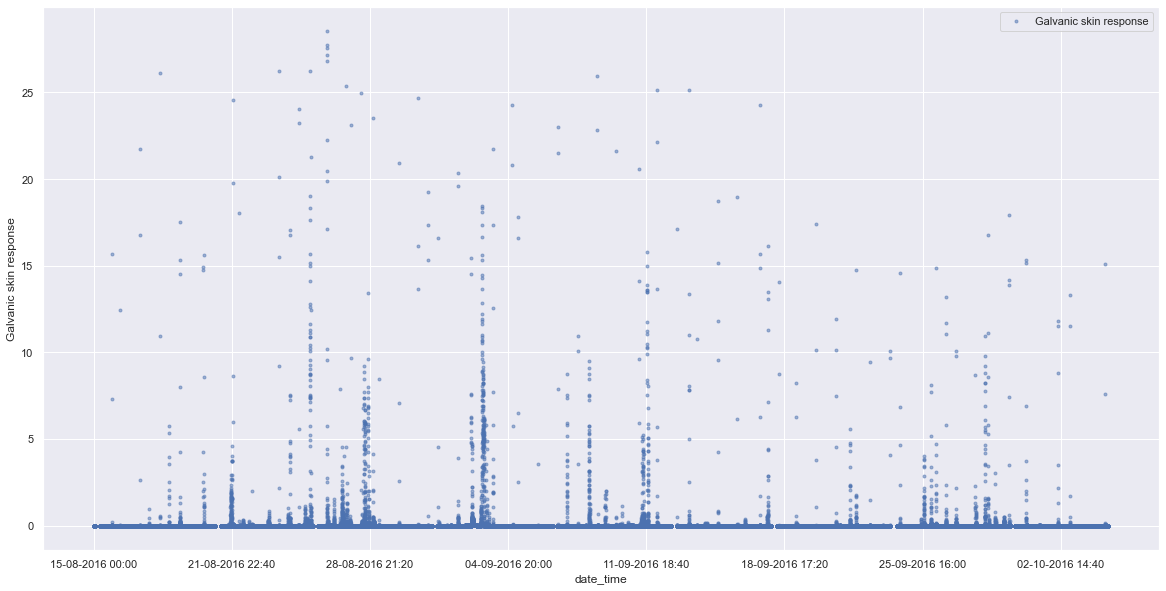

In [83]:
cols_plot = ['Galvanic skin response']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20,10), subplots=True)
for ax in axes:
    ax.set_ylabel('Galvanic skin response')

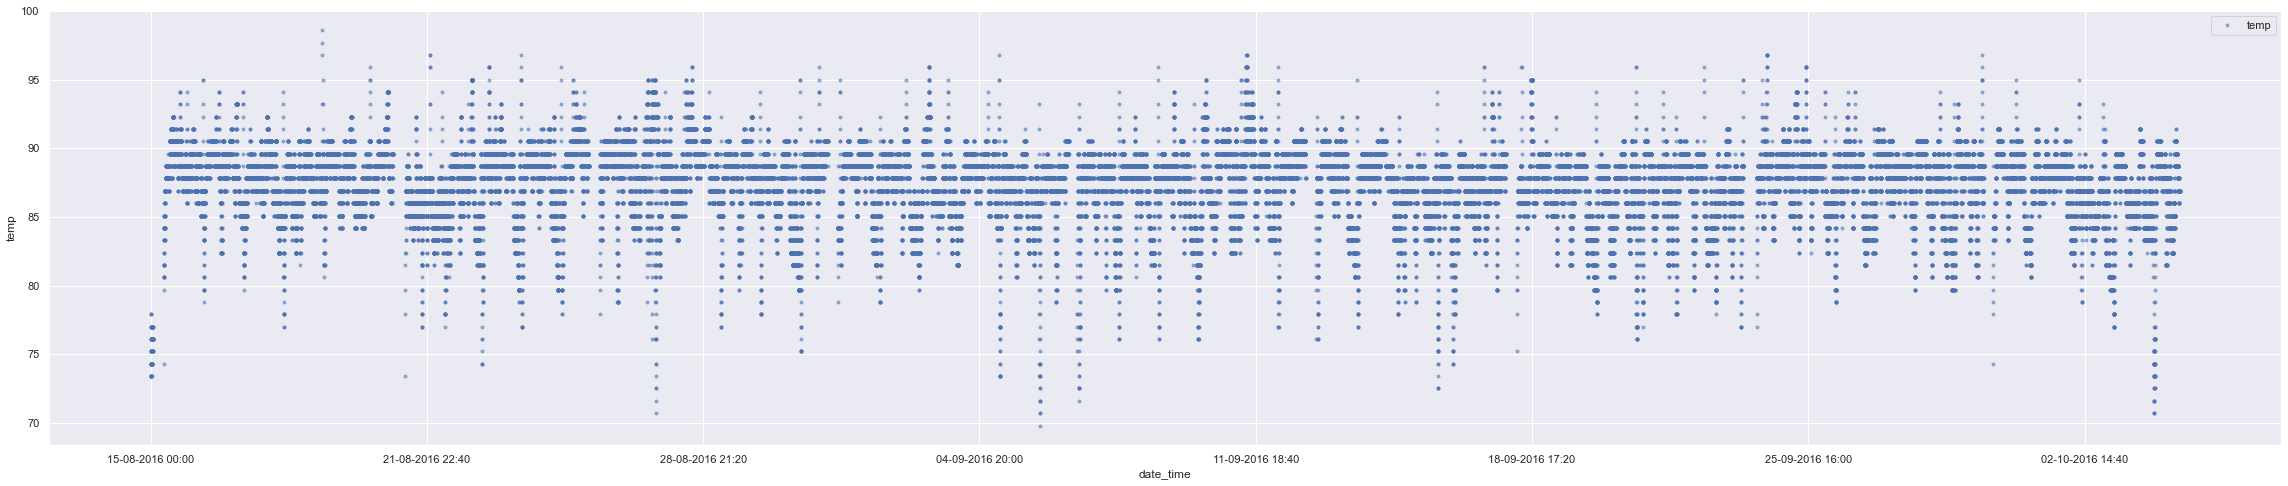

In [84]:
cols_plot = ['temp']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(40,8), subplots=True)
for ax in axes:
    ax.set_ylabel('temp')

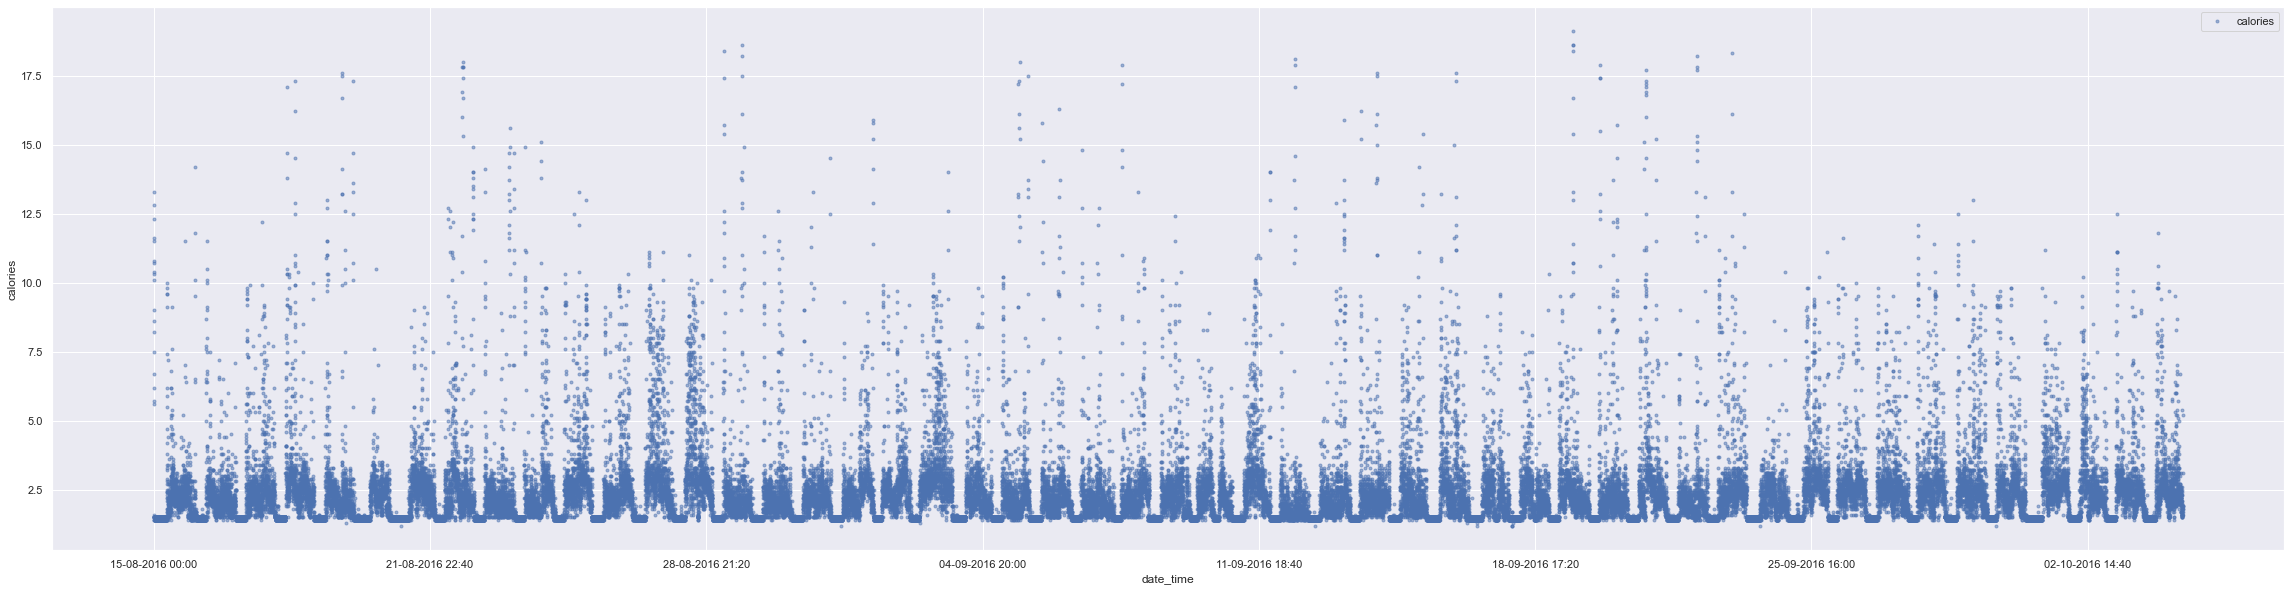

In [85]:
cols_plot = ['calories']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(40,10), subplots=True)
for ax in axes:
    ax.set_ylabel('calories')